<a href="https://colab.research.google.com/github/preethi9999/somarajupreethi_INFO5731_SPRING2020/blob/main/somaraju_preethi_inclass7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=ccd6a1a3a13135bb42008150c6cd990a061420d1d8881b92eb0a44ec3b558752
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [2]:
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# used for model visualisation
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#increasing the stopword list
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
import pandas as pd
import re
import numpy as np

In [15]:
#reading csv and printing the 100 rows
df = pd.read_csv('/content/sample_data/inclass7.csv')
df.head(100)

,Title
0,Data analysis in community and landscape ecology
1,Paleontological data analysis
2,Methods and data analysis of comparative resea...
3,Data analysis: A model comparison approach
4,Longitudinal data analysis for discrete and co...
...,...
95,Data analysis in qualitative research
96,Data analysis for scientists and engineers
97,Data analysis in social psychology
98,Data analysis & statistics for nursing research


In [16]:
# Converting the df into list
data = df.Title.values.tolist()
data = [re.sub('\s+', ' ', i) for i in data]

print(data)

['Data analysis in community and landscape ecology', 'Paleontological data analysis', 'Methods and data analysis of comparative research.', 'Data analysis: A model comparison approach', 'Longitudinal data analysis for discrete and continuous outcomes', 'Categorical data analysis using SAS', 'Data analysis using regression and multilevel/hierarchical models', 'Optimized monte carlo data analysis', 'ggplot2: elegant graphics for data analysis', 'Data analysis: a Bayesian tutorial', 'Qualitative data analysis with ATLAS. ti', 'Applied survey data analysis', 'Statistical methods for spatial data analysis', 'Hierarchical linear models: Applications and data analysis methods.', 'Spatial data analysis: theory and practice', 'Dealing with data: Using NVivo in the qualitative data analysis process', 'Geophysical data analysis: Discrete inverse theory', 'Multivariate data analysis: in practice: an introduction to multivariate data analysis and experimental design', 'Longitudinal data analysis', 

In [17]:
#splitting into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words)

[['data', 'analysis', 'in', 'community', 'and', 'landscape', 'ecology'], ['paleontological', 'data', 'analysis'], ['methods', 'and', 'data', 'analysis', 'of', 'comparative', 'research'], ['data', 'analysis', 'model', 'comparison', 'approach'], ['longitudinal', 'data', 'analysis', 'for', 'discrete', 'and', 'continuous', 'outcomes'], ['categorical', 'data', 'analysis', 'using', 'sas'], ['data', 'analysis', 'using', 'regression', 'and', 'multilevel', 'hierarchical', 'models'], ['optimized', 'monte', 'carlo', 'data', 'analysis'], ['ggplot', 'elegant', 'graphics', 'for', 'data', 'analysis'], ['data', 'analysis', 'bayesian', 'tutorial'], ['qualitative', 'data', 'analysis', 'with', 'atlas', 'ti'], ['applied', 'survey', 'data', 'analysis'], ['statistical', 'methods', 'for', 'spatial', 'data', 'analysis'], ['hierarchical', 'linear', 'models', 'applications', 'and', 'data', 'analysis', 'methods'], ['spatial', 'data', 'analysis', 'theory', 'and', 'practice'], ['dealing', 'with', 'data', 'using', 

In [20]:
#building models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#example
print(trigram_mod[bigram_mod[data_words[10]]])

['qualitative', 'data', 'analysis', 'with', 'atlas', 'ti']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [21]:
# Defining functions
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
# Removing stopwords and form bigrams
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

#lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized)

[['landscape', 'ecology'], ['paleontological', 'analysis'], ['method'], ['comparison', 'approach'], ['longitudinal', 'analysis', 'discrete', 'continuous', 'outcome'], ['categorical', 'analysis', 'use'], ['datum', 'analysis', 'use', 'regression', 'multilevel', 'hierarchical', 'model'], ['optimize', 'analysis'], ['elegant', 'graphic', 'data', 'analysis'], ['tutorial'], ['qualitative', 'analysis'], ['analysis'], ['statistical', 'method', 'spatial', 'datum', 'analysis'], ['analysis', 'method'], ['spatial', 'theory', 'practice'], ['deal', 'use', 'analysis', 'process'], ['geophysical', 'discrete', 'inverse', 'theory'], ['analysis', 'practice', 'introduction', 'multivariate', 'design'], ['longitudinal', 'analysis'], ['analysis', 'biologist'], ['datum'], ['graphical', 'analysis'], ['analysis', 'social', 'scientist'], ['introduction', 'geological', 'datum', 'analysis'], ['analysis'], ['absorption', 'spectroscopy', 'use', 'ifeffit'], ['analysis'], ['analysis'], ['analysis'], ['analysis'], ['appl

In [23]:
#creating dictionary
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1)], [(2, 1), (3, 1)], [(4, 1)], [(5, 1), (6, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (11, 1), (12, 1)], [(2, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(2, 1), (18, 1)], [(2, 1), (19, 1), (20, 1), (21, 1)], [(22, 1)], [(2, 1), (23, 1)], [(2, 1)], [(2, 1), (4, 1), (13, 1), (24, 1), (25, 1)], [(2, 1), (4, 1)], [(24, 1), (26, 1), (27, 1)], [(2, 1), (12, 1), (28, 1), (29, 1)], [(8, 1), (27, 1), (30, 1), (31, 1)], [(2, 1), (26, 1), (32, 1), (33, 1), (34, 1)], [(2, 1), (9, 1)], [(2, 1), (35, 1)], [(13, 1)], [(2, 1), (36, 1)], [(2, 1), (37, 1), (38, 1)], [(2, 1), (13, 1), (33, 1), (39, 1)], [(2, 1)], [(12, 1), (40, 1), (41, 1), (42, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(2, 1), (9, 1), (13, 1), (15, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(13, 1), (47, 1), (48, 1), (49, 1)], [(2, 1), (13, 1), (24, 1)], [(5, 1), (50, 1)], [(2, 1), (12, 1), (19, 1), (51, 1), (52, 1), (53, 1)], [(2, 1), (4, 1)], [(5, 1)], [(13, 1), (54, 1)], [(2, 1), (4,

In [24]:
#easy way to understand the above frequency
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('ecology', 1), ('landscape', 1)],
 [('analysis', 1), ('paleontological', 1)],
 [('method', 1)],
 [('approach', 1), ('comparison', 1)],
 [('analysis', 1),
  ('continuous', 1),
  ('discrete', 1),
  ('longitudinal', 1),
  ('outcome', 1)],
 [('analysis', 1), ('categorical', 1), ('use', 1)],
 [('analysis', 1),
  ('use', 1),
  ('datum', 1),
  ('hierarchical', 1),
  ('model', 1),
  ('multilevel', 1),
  ('regression', 1)],
 [('analysis', 1), ('optimize', 1)],
 [('analysis', 1), ('data', 1), ('elegant', 1), ('graphic', 1)],
 [('tutorial', 1)],
 [('analysis', 1), ('qualitative', 1)],
 [('analysis', 1)],
 [('analysis', 1),
  ('method', 1),
  ('datum', 1),
  ('spatial', 1),
  ('statistical', 1)],
 [('analysis', 1), ('method', 1)],
 [('spatial', 1), ('practice', 1), ('theory', 1)],
 [('analysis', 1), ('use', 1), ('deal', 1), ('process', 1)],
 [('discrete', 1), ('theory', 1), ('geophysical', 1), ('inverse', 1)],
 [('analysis', 1),
  ('practice', 1),
  ('design', 1),
  ('introduction', 1),
  ('mul

In [25]:
# Building LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.311*"analysis" + 0.108*"datum" + 0.103*"method" + 0.043*"use" + 0.042*"spatial" + 0.032*"model" + 0.030*"statistical" + 0.022*"data" + 0.022*"genetic" + 0.022*"hierarchical"'), (1, '0.056*"inversion" + 0.056*"seismic" + 0.056*"dual" + 0.056*"processing" + 0.056*"scaling" + 0.056*"application" + 0.056*"measurement" + 0.056*"procedure" + 0.056*"nursing" + 0.056*"datum"'), (2, '0.206*"analysis" + 0.133*"data" + 0.046*"approach" + 0.046*"comparison" + 0.046*"statistical" + 0.046*"elegant" + 0.046*"graphic" + 0.046*"miss" + 0.034*"introduction" + 0.034*"qualitative"'), (3, '0.084*"datum" + 0.075*"oceanography" + 0.075*"physical" + 0.075*"system" + 0.075*"method" + 0.007*"analysis" + 0.007*"introduction" + 0.007*"practice" + 0.007*"design" + 0.007*"multivariate"'), (4, '0.152*"analysis" + 0.109*"qualitative" + 0.073*"paleontological" + 0.050*"tutorial" + 0.049*"geophysical" + 0.049*"inverse" + 0.049*"theory" + 0.049*"discrete" + 0.026*"apply" + 0.026*"software"'), (5, '0.089*"analysi

In [28]:
# measure efficiency of model and calculate coherence score
print('\nMeasure of Perplexity: ', lda_model.log_perplexity(corpus)) 

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Measure of Perplexity:  -4.731141480751205
Coherence Score:  0.618283189636853


In [29]:
# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.162435  0.091321       1        1  28.627597
9      0.133876  0.008767       2        1  14.643903
2      0.071838 -0.090791       3        1  11.981670
4      0.029044 -0.169685       4        1  11.333706
6      0.080260  0.090291       5        1  11.281822
7      0.011960  0.031561       6        1   7.814709
5     -0.077496 -0.083297       7        1   5.393163
1     -0.184835  0.075131       8        1   4.272231
3     -0.107436  0.068670       9        1   2.794472
8     -0.119645 -0.021968      10        1   1.856727, topic_info=           Term       Freq      Total Category  logprob  loglift
13        datum  14.000000  14.000000  Default  30.0000  30.0000
4        method  10.000000  10.000000  Default  29.0000  29.0000
5      approach   3.000000   3.000000  Default  28.0000  28.0000
19         data   7.000000   7.000000  Default  27.0000  27.0000
23  qualitative   5.000000   5.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
21      graphic   0.046014   2.183977  Topic10  -4.7449   0.1264
6    comparison   0.046014   2.183098  Topic10  -4.7449   0.1268
82  exploratory   0.046014   2.207936  Topic10  -4.7449   0.1155
32       design   0.046014   2.957388  Topic10  -4.7449  -0.1768
56      applied   0.046014   1.536831  Topic10  -4.7449   0.4778

[503 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
40        5  0.689683  absorption
2         1  0.422194    analysis
2         2  0.168878    analysis
2         3  0.118214    analysis
2         4  0.084439    analysis
...     ...       ...         ...
22        4  0.901238    tutorial
87        5  0.689683  understand
12        1  0.380729         use
12        2  0.253819         use
12        5  0.253819         use

[129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 3, 5, 7, 8, 6, 2, 4, 9])

In [30]:
!wget "http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip"
!unzip "/content/mallet-2.0.8.zip"

--2021-03-20 02:22:47--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.81MB/s    in 2.7s    

2021-03-20 02:22:51 (5.81 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/te

In [31]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [32]:
print(ldamallet.show_topics(formatted=False))

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('coherence: ', coherence_ldamallet)

[(8, [('datum', 0.46153846153846156), ('apply', 0.15384615384615385), ('multivariate', 0.07692307692307693), ('longitudinal', 0.07692307692307693), ('scientist', 0.07692307692307693), ('package', 0.07692307692307693), ('tutorial', 0.07692307692307693), ('tool', 0.0), ('call', 0.0), ('oceanography', 0.0)]), (3, [('research', 0.125), ('measurement', 0.125), ('biologist', 0.125), ('elegant', 0.125), ('procedure', 0.125), ('process', 0.125), ('occurrence', 0.125), ('engineer', 0.125), ('tool', 0.0), ('dyadic', 0.0)]), (12, [('spatial', 0.25), ('analysis', 0.25), ('multilevel', 0.08333333333333333), ('change', 0.08333333333333333), ('linear', 0.08333333333333333), ('tool', 0.08333333333333333), ('scaling', 0.08333333333333333), ('practical', 0.08333333333333333), ('triangulation', 0.0), ('engineer', 0.0)]), (6, [('analysis', 0.5555555555555556), ('data', 0.16666666666666666), ('genetic', 0.1111111111111111), ('multilevel', 0.05555555555555555), ('graphical', 0.05555555555555555), ('outcome'

In [37]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

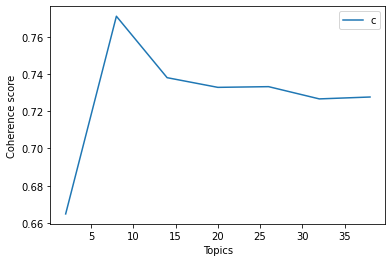

In [80]:
#plot the graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
#calculate the coherence score
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

In [45]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.308*"theory" + 0.154*"exploratory" + 0.154*"practice" + 0.077*"apply" + 0.077*"geophysical" + 0.077*"tutorial" + 0.077*"call" + 0.077*"comparison" + 0.000*"object" + 0.000*"oceanography"'), (1, '0.500*"datum" + 0.083*"software" + 0.083*"comprehensive" + 0.083*"ecology" + 0.083*"engineer" + 0.083*"metabolomic" + 0.083*"multivariate" + 0.000*"call" + 0.000*"dyadic" + 0.000*"tool"'), (2, '0.300*"paleontological" + 0.200*"miss" + 0.100*"inverse" + 0.100*"change" + 0.100*"longitudinal" + 0.100*"package" + 0.100*"biologist" + 0.000*"triangulation" + 0.000*"oceanography" + 0.000*"tool"'), (3, '0.647*"analysis" + 0.176*"statistical" + 0.059*"comparison" + 0.059*"ecology" + 0.059*"geological" + 0.000*"physical" + 0.000*"object" + 0.000*"triangulation" + 0.000*"oceanography" + 0.000*"call"'), (4, '0.385*"qualitative" + 0.077*"inverse" + 0.077*"triangulation" + 0.077*"elegant" + 0.077*"future" + 0.077*"procedure" + 0.077*"nursing" + 0.077*"measurement" + 0.077*"process" + 0.000*"call"'), 

In [46]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,2), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
                                                  
                                                  
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Text']

In [47]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.06,"spatial, landscape, tutorial, absorption, cont...",Data analysis in community and landscape ecology
1,1,2.0,0.07,"paleontological, miss, inverse, change, longit...",Paleontological data analysis
2,2,18.0,0.06,"method, orient, continuous, hierarchical, prac...",Methods and data analysis of comparative resea...
3,3,9.0,0.07,"analysis, approach, categorical, intelligent, ...",Data analysis: A model comparison approach
4,4,13.0,0.07,"analysis, discrete, genetic, occurrence, dyadi...",Longitudinal data analysis for discrete and co...


In [48]:
# Grouping sentences
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)
   
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords","Text"]
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.08,"theory, exploratory, practice, apply, geophysi...",Spatial data analysis: theory and practice
1,1.0,0.08,"datum, software, comprehensive, ecology, engin...",Using MetaboAnalyst 3.0 for comprehensive meta...
2,2.0,0.07,"paleontological, miss, inverse, change, longit...",Paleontological data analysis
3,3.0,0.06,"analysis, statistical, comparison, ecology, ge...",Applied survey data analysis
4,4.0,0.08,"qualitative, inverse, triangulation, elegant, ...",Random data: analysis and measurement procedures


In [50]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

topic_contribution = round(topic_counts/topic_counts.sum(), 4)

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

#defining the columns
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,14.0,"spatial, landscape, tutorial, absorption, cont...",8.0,0.08
1.0,2.0,"paleontological, miss, inverse, change, longit...",2.0,0.02
2.0,18.0,"method, orient, continuous, hierarchical, prac...",4.0,0.04
3.0,9.0,"analysis, approach, categorical, intelligent, ...",1.0,0.01
4.0,13.0,"analysis, discrete, genetic, occurrence, dyadi...",8.0,0.08
...,...,...,...,...
95.0,0.0,"theory, exploratory, practice, apply, geophysi...",NaN,NaN
96.0,1.0,"datum, software, comprehensive, ecology, engin...",NaN,NaN
97.0,18.0,"method, orient, continuous, hierarchical, prac...",NaN,NaN
98.0,4.0,"qualitative, inverse, triangulation, elegant, ...",NaN,NaN


(2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [51]:
#importing required modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [71]:
def load_data(path,file_name):
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("total documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [72]:
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

In [73]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [74]:
#LSA model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [75]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [82]:
#visualizing the graph
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Topics")
    plt.ylabel("coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [77]:
#LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","/content/sample_data/inclass7.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

total documents: 1
[(0, '0.713*"analysi" + 0.657*"data" + 0.098*"ndata" + 0.077*"method" + 0.063*"nqualit" + 0.056*"use" + 0.056*"model" + 0.042*"introduct" + 0.042*"nappli" + 0.042*"nlongitudin"')]


In [78]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.708*"data" + 0.662*"analysi" + 0.098*"qualit" + 0.083*"method" + 0.062*"use" + 0.061*"statist" + 0.055*"multivari" + 0.055*"introduct" + 0.051*"longitudin" + 0.050*"model"'), (1, '0.487*"multivari" + 0.323*"design" + 0.305*"experiment" + -0.302*"model" + 0.302*"practic" + 0.293*"introduct" + -0.260*"use" + -0.259*"method" + -0.197*"hierarch" + -0.145*"linear"'), (2, '-0.549*"qualit" + 0.546*"method" + 0.328*"statist" + -0.240*"use" + -0.185*"nvivo" + -0.164*"process" + 0.148*"spatial" + -0.146*"deal" + 0.098*"applic" + 0.087*"linear"'), (3, '-0.448*"model" + 0.354*"qualit" + -0.345*"use" + -0.267*"hierarch" + 0.266*"statist" + -0.234*"multivari" + 0.195*"research" + 0.190*"method" + -0.175*"longitudin" + -0.171*"regress"'), (4, '-0.407*"longitudin" + 0.349*"qualit" + -0.345*"discret" + 0.312*"method" + 0.193*"multivari" + -0.181*"continu" + -0.181*"outcom" + 0.179*"hierarch" + -0.176*"invers" + 0.173*"introduct"'), (5, '0.431*"use" + -0.283*"model" + -0.278*"qualit" + 0.272*"st

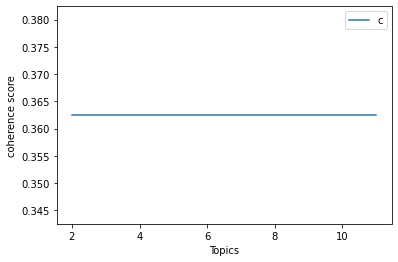

In [79]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

(3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
''' 
Topic modelling : In machine learning and natural language processing, a topic model is type of statistical model of discovering the abstract topics that occur in group of documents
it is frequently used text mining tool used to find hidden semantic structures in the text.

two major algorithms of topic modelling are:

LSA

Latent Semantic Analysis, or LSA, is one of the basic foundation techniques in topic modeling. It is also used in text summarization, text classification and dimension reduction. 
It is similar to the cosine similarity. For LSA, we generate a matrix by using the words present in the paragraphs of the document in the corpus. 
The rows of the matrix will represent the unique words present in each paragraph, and columns represent each paragraph. The basic assumption for the LSA algorithm 
is that words that are closer in their meaning will occur in a similar excerpt of the text.

The  plot of coherence value Vs number of topics shows that coherence score almost same with the number of topics. 
and also coherence value observed for the data using LSA algorithm is 0.38

LDA

In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved 
groups that explain why some parts of the data are similar.Latent Dirichlet allocation (LDA) is a topic model that generates topics based on word frequency from a set of 
documents. LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document set.

The  plot of coherence value Vs number of topics shows that coherence score decreases with the number of topics, with a decline between 15 to 20.
Now, choosing the number of topics still depends on our requirement because topic around 10 have good coherence scores but may have repeated keywords in the topic.
and also coherence value observed for the data using LDA algorithm is 0.76

Looking at the coherence scores and pattern, we can say that LDA is better algorithm when both models are compared.

'''
